# Importação das Bibliotecas

In [1]:
# Importação de Bibliotecas

import numpy as np
import pandas as pd
import tensorflow as tf

# Carregamento dos dados e codificação de variáveis categóricas

In [2]:
# Carregando o dataset

dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# Codificando a variável Sexo

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [5]:
# Codificando a variável Geografia

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Divisão dos dados

In [6]:
# Dividindo o dataset em dados de treino e teste

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Dimensionamento dos recursos

In [7]:
# Dimensionamento de Recursos

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Construção da Rede Neural


In [8]:
# Inicializando a RNA

rna = tf.keras.models.Sequential()

In [9]:
# Adicionando a camada de entrada e a primeira camada oculta

rna.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [10]:
# Adicionando a segunda camada oculta

rna.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [11]:
# Adicionaldo a camada de saída

rna.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Treinamento da Rede Neural

In [12]:
# Compilando a RNA

rna.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Treinamento da RNA

rna.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5480 - accuracy: 0.7654
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4515 - accuracy: 0.8048
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4350 - accuracy: 0.8086
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4264 - accuracy: 0.8134
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8159
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4102 - accuracy: 0.8210
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4010 - accuracy: 0.8280
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3916 - accuracy: 0.8342
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8365
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3741 - accura

# Previsão para uma entrada específica

Prevendo dados para a seguinte entrada:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: 60000

Number of Products 2

Credit Card: Yes

Active Member: Yes

Estimated Salary: 50000



In [14]:
# Previsão

print(rna.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


# Previsão para os dados de teste

In [15]:
# Previsão

previsoes = rna.predict(X_test)
previsoes = (previsoes > 0.5)
print(np.concatenate((previsoes.reshape(len(previsoes),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Matriz de Confusão

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, previsoes)
print(cm)
accuracy_score(y_test, previsoes)

[[1520   75]
 [ 200  205]]


0.8625

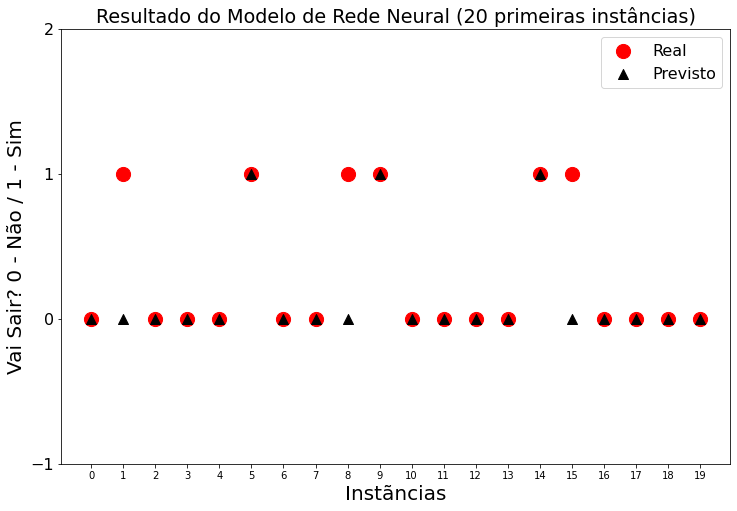

In [17]:
# Visualização dos resultados do Modelo de Rede Neural nos dados de teste

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['font.size'] = 16
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 20

tamanho = 20
plt.scatter(range(0, tamanho), y_test[0:tamanho], s=200, color='red', label='Real')
plt.scatter(range(0, tamanho), previsoes[0:tamanho], color='black', marker='^', s=100, label='Previsto')
plt.title('Resultado do Modelo de Rede Neural ({} primeiras instâncias)'.format(tamanho))
plt.xlabel('Instãncias')
plt.xticks(range(0, tamanho))
plt.yticks(range(-1, 3))
plt.ylabel('Vai Sair? 0 - Não / 1 - Sim')
plt.legend()
plt.show()